# Prática: Predição de hipotireoidismos com Machine learning

* Objetivo: aplicar o algoritmo de machine learning Árvore de decisão para predizer hipotireoidismo em pacientes. 

* Hipotireoidismo: doença caracterizada pela redução da produção de hormônios da tireoide, que controlam o metabolismo do organismo.

* O algoritmo receberá os dados de entrada e irá predizer se o paciente tem ou não hipotireoidismo.

### 1. Importando as bibliotecas

In [1]:
# importando as bibliotecas 
import pandas as pd # manipulação de dados
import numpy as np # manipulação de dados
import matplotlib.pyplot as plt # visualização de dados
from sklearn.tree import DecisionTreeClassifier #Para criar o modelo de árvore de decisão
from sklearn.model_selection import train_test_split #Para dividir o dataset em treino e teste
from sklearn import tree
from sklearn.preprocessing import StandardScaler

### Limpeza dos dados

In [2]:
# carregando o dataset 
dataset = pd.read_csv('hypothyroid.csv')
dataset.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
# exibindo as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
# selecionando as colunas que serão utilizadas 
# esse processo de seleção está sendo feito para facilitar a visualização dos dados
# mas, para selecionar as colunas que serão utilizadas no modelo, aplicamos técnicas de seleção de features
# como por exemplo, o método de correlação de Pearson, feature importance, etc.
new_dataset = dataset[['age', 'sex', 'tumor', 'hypopituitary', 'TSH', 'TT4', 'T4U', 'binaryClass']]

In [5]:
# exibindo as informações do dataset
new_dataset.head()

,age,sex,tumor,hypopituitary,TSH,TT4,T4U,binaryClass
0,41,F,f,f,1.3,125,1.14,P
1,23,F,f,f,4.1,102,?,P
2,46,M,f,f,0.98,109,0.91,P
3,70,F,f,f,0.16,175,?,P
4,70,F,f,f,0.72,61,0.87,P


Veja que existem valores não numéricos no dataset. Para que o algoritmo de machine learning funcione, é necessário que todos os dados sejam numéricos. Para isso, vamos substituir os valores não numéricos por valores numéricos.

In [ ]:
# Transformando os valores de variáveis categoricas para numerico
new_dataset['tumor'] = new_dataset['tumor'].astype("category").cat.codes.values
new_dataset['hypopituitary'] = new_dataset['hypopituitary'].astype("category").cat.codes.values
new_dataset['sex'] = new_dataset['sex'].astype("category").cat.codes.values
new_dataset['binaryClass'] = new_dataset['binaryClass'].astype("category").cat.codes.values    # df['classificação'] labels into numbers 0 is not sick and 1 is sick


Veja que agora temos apenas valores numéricos no dataset.

In [7]:
new_dataset.head()

,age,sex,tumor,hypopituitary,TSH,TT4,T4U,binaryClass
0,41,1,0,0,1.3,125,1.14,1
1,23,1,0,0,4.1,102,?,1
2,46,2,0,0,0.98,109,0.91,1
3,70,1,0,0,0.16,175,?,1
4,70,1,0,0,0.72,61,0.87,1


Precisamos agora tratar os dados faltantes. Os dados faltantes estão representados pelo ? no dataset. Podemos trata-los de duas formas:

* Remover as linhas que possuem dados faltantes
* Substituir os dados faltantes pela média dos valores da coluna

Vamos remover as linhas que possuem dados faltantes.

In [8]:
# verificando os dados faltantes marcados com ? 
new_dataset[new_dataset == '?'].count()

age                1
sex                0
tumor              0
hypopituitary      0
TSH              369
TT4              231
T4U              387
binaryClass        0
dtype: int64

In [ ]:
new_dataset.drop(new_dataset[new_dataset['sex'] == '?'].index, inplace=True)
new_dataset.drop(new_dataset[new_dataset['TSH'] == '?'].index, inplace=True)
new_dataset.drop(new_dataset[new_dataset['T4U'] == '?'].index, inplace=True)
new_dataset.drop(new_dataset[new_dataset['TT4'] == '?'].index, inplace=True)

In [ ]:
new_dataset['age'] = new_dataset['age'].replace('?', new_dataset['age'].loc[new_dataset['age'] != '?'].astype('int').mean())

Vamos verificar se ainda existem dados faltantes no dataset.

In [11]:
new_dataset[new_dataset == '?'].count()

age              0
sex              0
tumor            0
hypopituitary    0
TSH              0
TT4              0
T4U              0
binaryClass      0
dtype: int64

Veja que agora não existem mais dados faltantes no dataset.

Precisamos agora verificar se o dataset está balanceado. Para isso, vamos verificar a quantidade de pacientes que possuem hipotireoidismo e a quantidade de pacientes que não possuem hipotireoidismo.

In [12]:
new_dataset['binaryClass'].value_counts() 

1    2958
0     266
Name: binaryClass, dtype: int64

Veja que os dados estão desbalanceados. Para que o algoritmo de machine learning funcione corretamente, é necessário que os dados estejam balanceados. 

### Balanceamento

Precisamos agora separar os dados de entrada (dataset) dos dados de saída (output_label_dataset). Os dados de entrada são os dados que serão utilizados para predizer os dados de saída. Os dados de saída são os dados que queremos predizer.

In [13]:
output_label_dataset = new_dataset['binaryClass']
dataset = new_dataset.drop(['binaryClass'], axis=1)

Vamos balancer o dataset utilizando a técnica SMOTE. A técnica SMOTE consiste em criar novos dados sintéticos para balancear o dataset. 

O SMOTE cria novos dados sintéticos para a classe minoritária. Veja que agora o dataset está balanceado após a aplicação da técnica.

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
dataset_res, ouput_label = sm.fit_resample(dataset, output_label_dataset)

In [15]:
ouput_label.value_counts()

1    2958
0    2958
Name: binaryClass, dtype: int64

### Divisão dos dados em Treino e Teste

In [16]:
#80 % para treino e 20% para teste
input_train, input_test, output_train, output_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

### Padronização dos dados 

A padronização dos dados consiste em transformar os dados para que tenham média 0 e desvio padrão 1. Isso é necessário para que os dados não fiquem com pesos diferentes no algoritmo de machine learning.

A padronização dos dados ajuda o algoritmo de machine learning a convergir mais rápido. Os dados estarão em uma mesma escala.

In [17]:
scaler = StandardScaler() # instanciancia para padronização dos dados
input_train = scaler.fit_transform(input_train) # padronização dos dados de treino
input_test = scaler.transform(input_test) # padronização dos dados de teste

In [18]:
print("Treino:", input_train.shape, output_train.shape)
print("Teste:", input_test.shape, output_test.shape)

Treino: (4732, 7) (4732,)
Teste: (1184, 7) (1184,)


## Algoritmo de Machine Learning - Árvore de Decisão

O algoritmo de machine learning que vamos utilizar é a Árvore de Decisão. A Árvore de Decisão é um algoritmo de aprendizado supervisionado que pode ser utilizado tanto para classificação quanto para regressão.

Neste exemplo, o algoritmo irá predizer se o paciente tem ou não hipotireoidismo.

In [19]:
# Modelo de árvore de decisão
model= DecisionTreeClassifier()
model.fit(input_train, output_train) #Treinamento
# Fazer a classificação 
output_model_decision = model.predict(input_test)

### Representação Gráfica

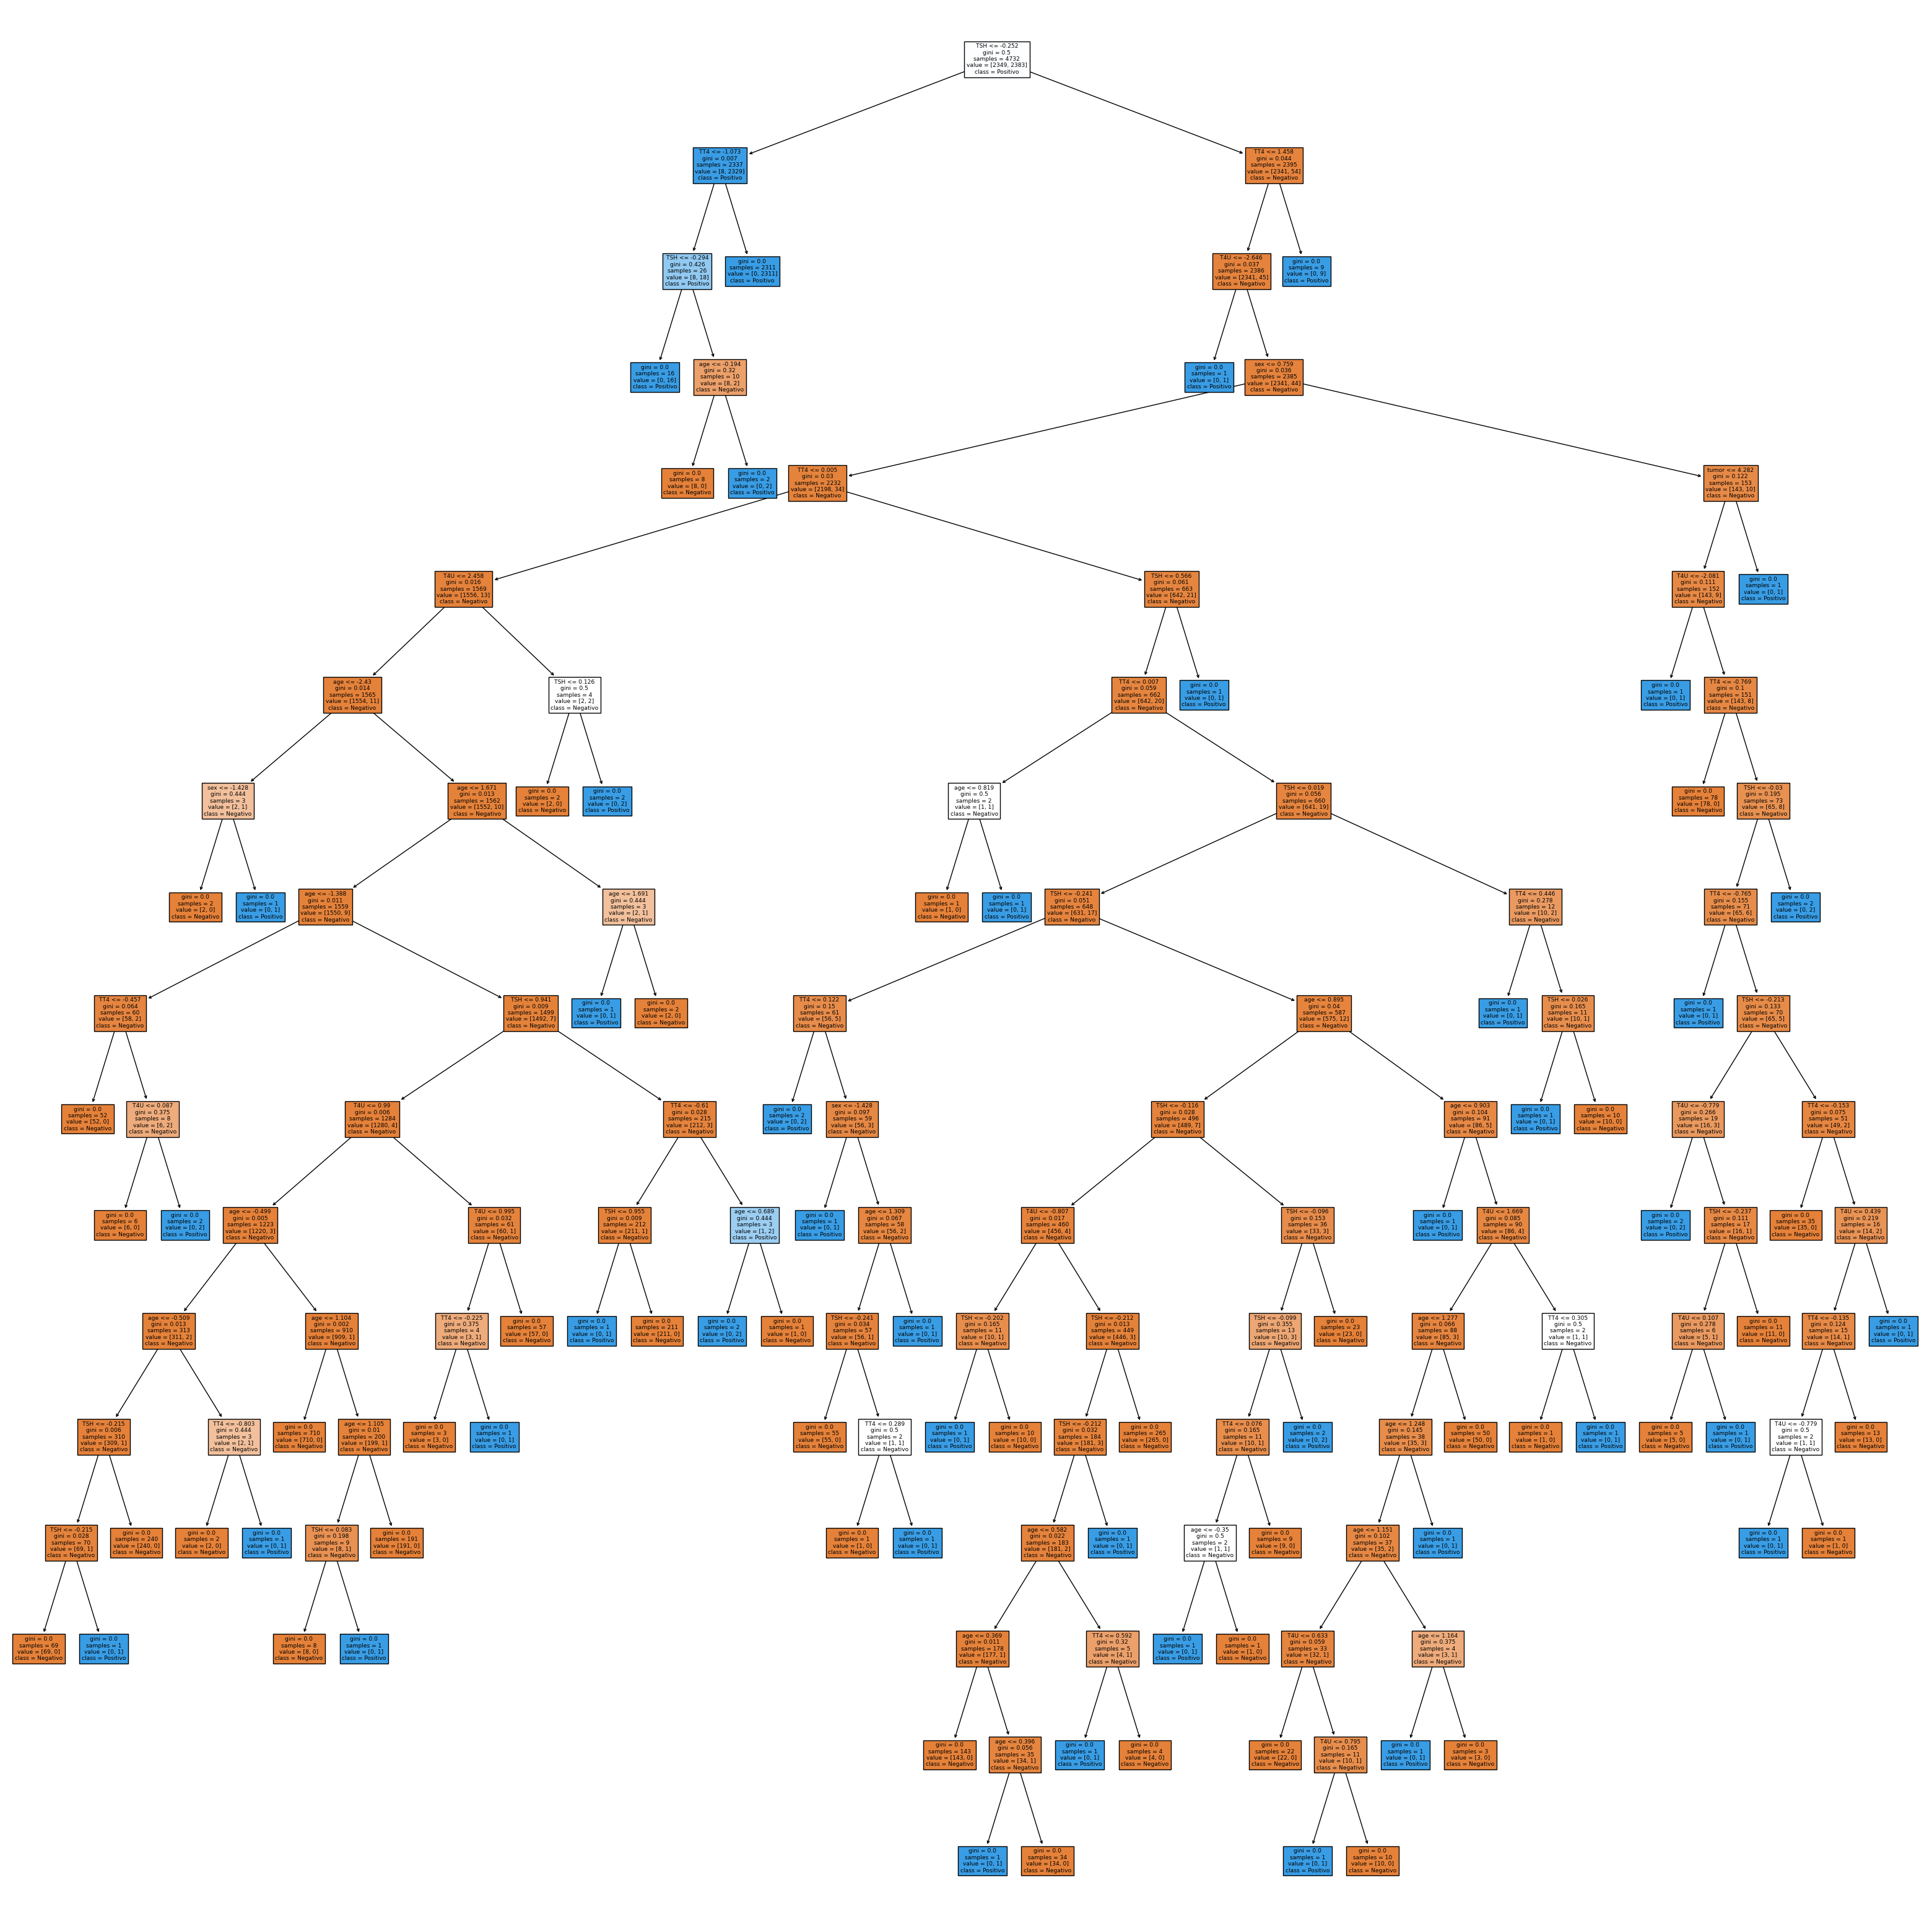

In [20]:
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(model, 
                   feature_names=new_dataset.columns,  
                   class_names=['Negativo', 'Positivo'],
                   filled=True)


In [21]:
text_representation = tree.export_text(model)
print(text_representation)


|--- feature_4 <= -0.25
|   |--- feature_5 <= -1.07
|   |   |--- feature_4 <= -0.29
|   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.29
|   |   |   |--- feature_0 <= -0.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.19
|   |   |   |   |--- class: 1
|   |--- feature_5 >  -1.07
|   |   |--- class: 1
|--- feature_4 >  -0.25
|   |--- feature_5 <= 1.46
|   |   |--- feature_6 <= -2.65
|   |   |   |--- class: 1
|   |   |--- feature_6 >  -2.65
|   |   |   |--- feature_1 <= 0.76
|   |   |   |   |--- feature_5 <= 0.00
|   |   |   |   |   |--- feature_6 <= 2.46
|   |   |   |   |   |   |--- feature_0 <= -2.43
|   |   |   |   |   |   |   |--- feature_1 <= -1.43
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  -1.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -2.43
|   |   |   |   |   |   |   |--- feature_0 <= 1.67
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.39
|   |   |   |   |  

In [22]:
fig.savefig("decistion_tree.png")


### Avaliação do modelo

In [23]:
# Acurácia
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
acuracia = accuracy_score(output_test, output_model_decision)
print('Acurácia: %f' % acuracia)

Acurácia: 0.977196


A acurácia do modelo é de 97.8%. Isso significa que o modelo acertou 97.8% das predições.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(output_test, output_model_decision)

array([[599,  10],
       [ 17, 558]])

A matriz de confusão mostra que o modelo acertou 569 das predições de pacientes que não possuem hipotireoidismo. O modelo acertou 590 das predições de pacientes que possuem hipotireoidismo.

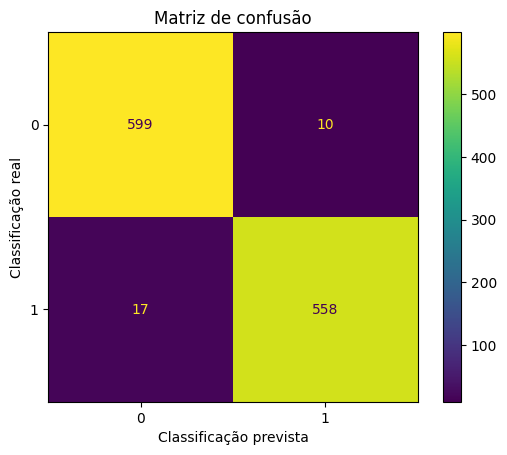

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(output_test, output_model_decision)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()

### Usando o modelo treinado

In [26]:
def prediction(values): 
    """ Função para realizar a predição 
    se uma pessoa tem ou não hipotireoidismo

    Args:
        values (_type_): dados do paciente
    """

    response = model.predict(pd.DataFrame(values)) # faz a chamada do modelo e passa os valores para predição
    if response: # se o valor for 1, a pessoa está doente
        print('Doente')
    else: # se o valor for 0, a pessoa não está doente
        print('Não doente')

Vamos utilizar o modelo treinado para predizer se o paciente com os seguintes dados tem ou não hipotireoidismo:

In [27]:
#age 39
#sex 0 (F)
#tumor 0 (Não tem)
#hypopituitary 0 (Não tem)
#TSH 4.9877
#TT4 120
#T4U 1.98
test = scaler.transform([[39, 0, 0, 0, 4.9877, 120, 1.98]]) # padronização dos dados para inserir no modelo

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
# faz a chamada da função para realizar a predição e saber se a pessoa está doente ou não
prediction(test)

Doente
